In [1]:

# Basic imports

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import qcodes as qc




# Set matplotlib plots in intercative mode

%matplotlib notebook



# Import QCoDeS specific packages

from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.plotting import plot_by_id



# Constants

Go = 7.7480917310e-5 # Conductance Quantum




# List of colours for plotting  

color_palette = ['y','m','c','lime','grey']

In [2]:

# Create a database 


database = qc.initialise_or_create_database_at(qc.config.core.db_location)



# Load the database file
# Change the path according to your desired location

qc.config['core']['db_location'] = "/Users/qdev/OneDrive/Documents/KU/PhD/Scripts/PPMS/Data/Qdev999InSbPbAlchip1.db"


In [3]:

# Experiment ID number (exn) [XXX]: It's represented in the database as "results_XXX_1"

exn = 23

# Run ID number (idn) [YYY]: is often different than the experniment ID causing confusion
# To load and plot data we use "runID"
# You can find the comparison of experiment ID and run ID under the following path:
# DBbrowserSQLlite > Browse data > runs
idn = 13

# Create the pandas dataframe for a particular run ID

data = load_by_id(idn)
dfdict = data.get_data_as_pandas_dataframe()
dfs_to_save = list()
for _, df in dfdict.items():
    dfs_to_save.append(df)
dataframe = pd.concat(dfs_to_save, axis=1)


In [4]:

# Here you can see how your dataset looks like

dataframe



# The first collumn (with bold font) is the x-index
# and you can acces it with the command "dataframe.index"

# The other columns are the parameters that you measured in this experiment
# and you can access them with the commands
# "dataframe.columns" and "dataframe['parameter_title']"



,KL_smub_curr,SR830_P,SR830_R,SR830_conductance
KL_smub_volt,,,,
0.002718,-7.498260e-12,-0.078,0.204286,26.330483
0.101519,1.153230e-10,0.288,0.204072,26.358103
0.200176,1.180410e-10,0.288,0.204804,26.460451
0.301790,1.260280e-10,0.204,0.205506,26.543181
0.399947,1.128790e-10,0.132,0.206056,26.610165
0.501966,1.268510e-10,0.054,0.206452,26.653402
0.600481,1.289960e-10,0.018,0.206605,26.669147
0.702262,1.410370e-10,-0.006,0.206666,26.673148
0.801301,1.287460e-10,-0.024,0.206574,26.657403


In [5]:

# Here you can get the names of the parameters that you measured

dataframe.columns

        

Index(['KL_smub_curr', 'SR830_P', 'SR830_R', 'SR830_conductance'], dtype='object')

In [6]:

# Save the independent parameter as an np.array
# This will help you to manipulate the lists if necessary

gate_voltage = np.array(dataframe.index)


# Save the dependent parameter ie conductance

conductance = np.array(dataframe['SR830_conductance'])


/Users/qdev/anaconda3/envs/qcodes/qcodes/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  


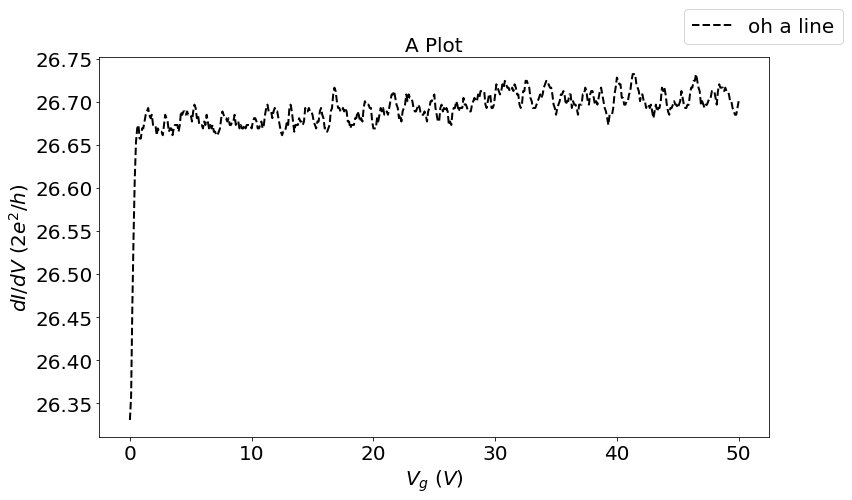

In [7]:

# Create a figure frame to plot your data

fig1,ax1 = plt.subplots(figsize = (12,7))

# Add your data
ax1.plot(gate_voltage, conductance,
         color     = 'k',
         linewidth = 2,
         linestyle = '--',
         alpha     = 1,
         label     = 'oh a line')

    
fig1.legend(loc='best', fontsize = 20 )

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('$V_g$ $(V)$', fontsize=20)
plt.ylabel('$dI/dV$ $(2e^2/h)$', fontsize=20)

plt.title('A Plot', fontsize=20)

#plt.savefig("plot.svg", dpi=150, transparent=False)

plt.show()




In [8]:
# If you want to add more than one IDs and
# you haven't used a do2d or doNd,
# you can do it with a for loop.

# First create empty lists for voltages, conductance etc.

conductance  = []
gate_voltage = []


# Use the same code but in a for loop for all the desires id's

# Select the idn's that you wasnt to iterate
ids = [13,14,15]


# Adding the data
for idn in ids:
    
    # Following is the typical code that we use to access the database
    # and save is as a dataframe
    
    data = load_by_id(idn)
    dfdict = data.get_data_as_pandas_dataframe()
    dfs_to_save = list()
    for _, df in dfdict.items():
        dfs_to_save.append(df)
    dataframe = pd.concat(dfs_to_save, axis=1)
    
    # Now we add the data to the lists
    
    gate_voltage.append(np.array(dataframe.index))
    conductance.append(np.array(dataframe['SR830_conductance']))

[]

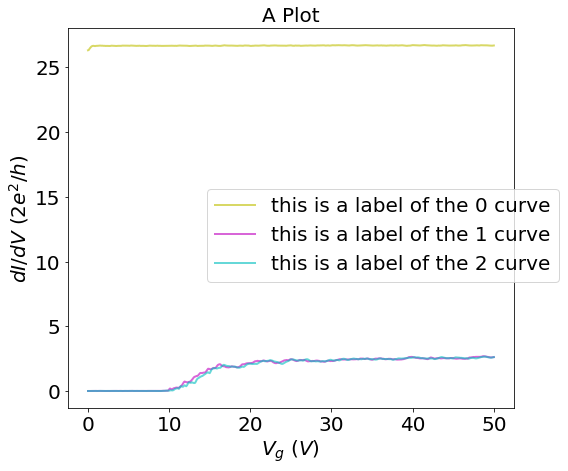

In [9]:
fig2,ax2 = plt.subplots(figsize = (8,7))


for i in range(len(ids)):
    
    ax2.plot(gate_voltage[i], conductance[i],
             color     = color_palette[i],
             linewidth = 2,
             linestyle = '-',
             alpha     = 0.6,
             label     = 'this is a label of the '+"{:.0f}".format(i)+' curve')
    
    
fig2.legend(loc='right', fontsize = 20 )



plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('$V_g$ $(V)$', fontsize=20)
plt.ylabel('$dI/dV$ $(2e^2/h)$', fontsize=20)

plt.title('A Plot', fontsize=20)




#plt.savefig("plot.svg", dpi=150, transparent=False)


plt.plot()




### References // Documentation